# Demo_Projects_CNN_numbers_recognition_Benbhk

In this project, will use the The MNIST database (Modified National Institute of Standards and Technology database), is a large database of handwritten digits.

## Import

In [45]:
# importation of the datasets from tensorflow
from tensorflow.keras import datasets

# conventional imports
import matplotlib.pyplot as plt
import random

## Loading the MNIST database

In [46]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

## Display of some exemple

<Figure size 432x288 with 0 Axes>

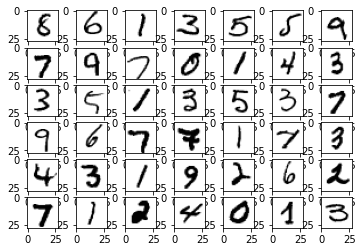

In [47]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

## Preprocessing

### Normalization (0_255 -> -0.5_0.5)

In [48]:
def img_normalizer(X):
    return X/255-0.5
    
X_train_normlz = img_normalizer(X_train)
X_test_normlz = img_normalizer(X_test)

#### Note : this normalisation keep the quality of the image.

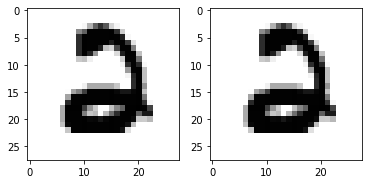

In [49]:
f, axarr = plt.subplots(1,2) 


axarr[0].imshow(X_train[82],cmap='gray_r')
axarr[1].imshow(X_train_normlz[82],cmap='gray_r')

### Inputs the RGB dimensionality in X_train and X_test

In [50]:
from tensorflow.keras.backend import expand_dims

X_train_normlz = expand_dims(X_train_normlz,axis=-1)
X_test_normlz = expand_dims(X_test_normlz,axis=-1)

2022-04-18 18:38:00.817824: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


In [51]:
X_test_normlz[1].shape

TensorShape([28, 28, 1])

### Categorize the y_train and y_test

In [53]:
y_test[7]

9

In [55]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [56]:
y_test_cat[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Model construction

### Building the CNN Architecture

In [57]:
from tensorflow.keras import layers, Sequential, models


def initialize_model():
    
    model = Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), strides=(1,1), input_shape=(28, 28, 1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), strides=(1,1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(10, activation='softmax')) 
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

model = initialize_model()

history = model.fit(X_train_normlz, y_train_cat,  
                    validation_split=0.3,
                    epochs=100, 
                    batch_size=4, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/100
10500/10500 [==============================] - 79s 7ms/step - loss: 0.2127 - accuracy: 0.9355 - val_loss: 0.0966 - val_accuracy: 0.9701
Epoch 2/100
10500/10500 [==============================] - 94s 9ms/step - loss: 0.0768 - accuracy: 0.9775 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 3/100
10500/10500 [==============================] - 111s 11ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 4/100
10500/10500 [==============================] - 111s 11ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 5/100
10500/10500 [==============================] - 95s 9ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 6/100
10500/10500 [==============================] - 161s 15ms/step - loss: 0.0375 - accuracy: 0.9885 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 7/100
10500/10500 [==============================] - 128s 12ms/step - loss: 0.0325 - accuracy: 0.989

In [65]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0.9,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

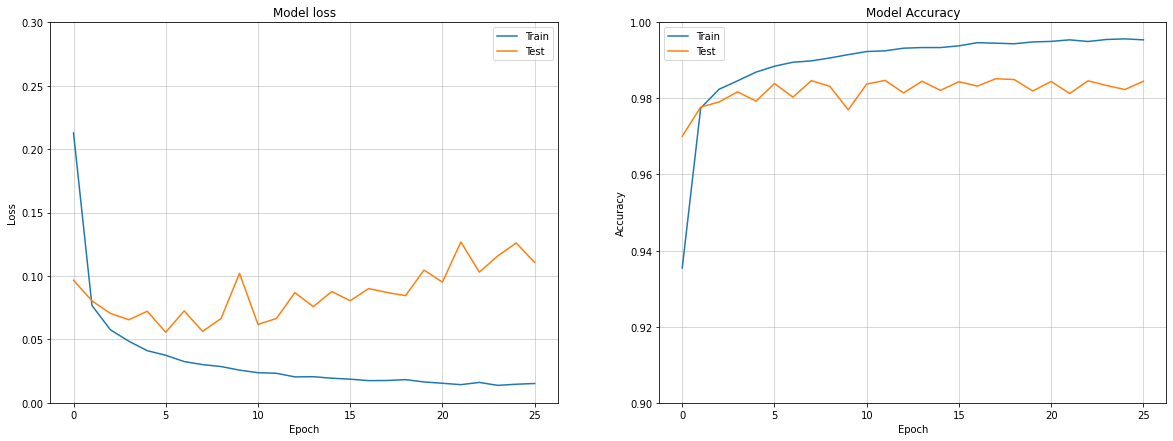

In [66]:
plot_loss_accuracy(history)

### Evalation

In [67]:
model.evaluate(X_test_normlz,y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0453 - accuracy: 0.9849


[0.04531124234199524, 0.9848999977111816]

98.5 % accurate on the test set